<a href="https://colab.research.google.com/github/saikasyap123/Bengaluru-House-Price-Prediction/blob/main/BHP2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df1 = pd.read_csv('Bengaluru_House_Data.csv')
df1.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [3]:
df1['area_type'].describe()

count                    13320
unique                       4
top       Super built-up  Area
freq                      8790
Name: area_type, dtype: object

In [4]:
df1.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [5]:
df1['area_type'].unique()

array(['Super built-up  Area', 'Plot  Area', 'Built-up  Area',
       'Carpet  Area'], dtype=object)

In [6]:
df1['availability'].describe()

count             13320
unique               81
top       Ready To Move
freq              10581
Name: availability, dtype: object

In [7]:
df1['availability'].unique()

array(['19-Dec', 'Ready To Move', '18-May', '18-Feb', '18-Nov', '20-Dec',
       '17-Oct', '21-Dec', '19-Sep', '20-Sep', '18-Mar', '20-Feb',
       '18-Apr', '20-Aug', '18-Oct', '19-Mar', '17-Sep', '18-Dec',
       '17-Aug', '19-Apr', '18-Jun', '22-Dec', '22-Jan', '18-Aug',
       '19-Jan', '17-Jul', '18-Jul', '21-Jun', '20-May', '19-Aug',
       '18-Sep', '17-May', '17-Jun', '21-May', '18-Jan', '20-Mar',
       '17-Dec', '16-Mar', '19-Jun', '22-Jun', '19-Jul', '21-Feb',
       'Immediate Possession', '19-May', '17-Nov', '20-Oct', '20-Jun',
       '19-Feb', '21-Oct', '21-Jan', '17-Mar', '17-Apr', '22-May',
       '19-Oct', '21-Jul', '21-Nov', '21-Mar', '16-Dec', '22-Mar',
       '20-Jan', '21-Sep', '21-Aug', '14-Nov', '19-Nov', '15-Nov',
       '16-Jul', '15-Jun', '17-Feb', '20-Nov', '20-Jul', '16-Sep',
       '15-Oct', '15-Dec', '16-Oct', '22-Nov', '15-Aug', '17-Jan',
       '16-Nov', '20-Apr', '16-Jan', '14-Jul'], dtype=object)

In [8]:
df2 = df1.copy()

In [9]:
def helper1(x):
  try :
    m = x.split('-')[1]
    return m
  except:
    return None

In [10]:
df2['availability'] = df2['availability'].apply(helper1)
df2.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,None,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,None,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,None,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,None,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [11]:
df2.isnull().sum()

area_type           0
availability    10597
location            1
size               16
society          5502
total_sqft          0
bath               73
balcony           609
price               0
dtype: int64

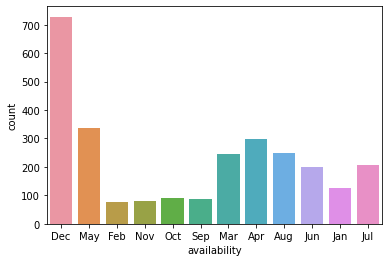

In [12]:
sns.countplot(x=df2['availability'])

In [13]:
df2['availability'].value_counts()

Dec    728
May    338
Apr    298
Aug    249
Mar    246
Jul    206
Jun    200
Jan    126
Oct     91
Sep     87
Nov     79
Feb     75
Name: availability, dtype: int64

In [14]:
df2['availability'] = df2['availability'].fillna('Dec')
df2.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Dec,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Dec,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Dec,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Dec,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [15]:
df2.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [16]:
df3 = df2.copy()

In [17]:
months = {
    "Jan":1,
    "Feb":2,
    "Mar":3,
    "Apr":4,
    "May":5,
    "Jun":6,
    "Jul":7,
    "Aug":8,
    "Sep":9,
    "Oct":10,
    "Nov":11,
    "Dec":12
}

In [18]:
def helper2(x):
  try:
    m = months[x]
    return m
  except:
    return -1

In [19]:
df3['availability'] = df3['availability'].apply(helper2)
df3.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,12,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,12,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,12,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,12,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,12,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [20]:
df3['availability'].value_counts()

12    11325
5       338
4       298
8       249
3       246
7       206
6       200
1       126
10       91
9        87
11       79
2        75
Name: availability, dtype: int64

In [21]:
df4 = df3.copy()

In [22]:
df4['location'].describe()

count          13319
unique          1305
top       Whitefield
freq             540
Name: location, dtype: object

In [23]:
df4.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [24]:
df4['location'] = df4['location'].fillna('Whitefield')
df4.isnull().sum()

area_type          0
availability       0
location           0
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [25]:
df4.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,12,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,12,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,12,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,12,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,12,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [26]:
df4['size'].describe()

count     13304
unique       31
top       2 BHK
freq       5199
Name: size, dtype: object

In [27]:
df4['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', nan, '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [40]:
def helper3(x):
  if x==np.nan:
    return x
  else: 
    bhk = x.split()[0]
    return int(bhk)
  

In [46]:
df4.isnull().sum()

area_type       0
availability    0
location        0
size            0
total_sqft      0
bath            0
balcony         0
price           0
dtype: int64

In [43]:
df4.drop(columns=['society'], inplace=True)
df4.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,12,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Plot Area,12,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Built-up Area,12,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Super built-up Area,12,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Super built-up Area,12,Kothanur,2 BHK,1200,2.0,1.0,51.00


In [45]:
df4 = df4.dropna()
df4.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,12,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Plot Area,12,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Built-up Area,12,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Super built-up Area,12,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Super built-up Area,12,Kothanur,2 BHK,1200,2.0,1.0,51.00


In [47]:
df4['size'] = df4['size'].apply(helper3)
df4.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,12,Electronic City Phase II,2,1056,2.0,1.0,39.07
1,Plot Area,12,Chikka Tirupathi,4,2600,5.0,3.0,120.00
2,Built-up Area,12,Uttarahalli,3,1440,2.0,3.0,62.00
3,Super built-up Area,12,Lingadheeranahalli,3,1521,3.0,1.0,95.00
4,Super built-up Area,12,Kothanur,2,1200,2.0,1.0,51.00


In [48]:
df4.isnull().sum()

area_type       0
availability    0
location        0
size            0
total_sqft      0
bath            0
balcony         0
price           0
dtype: int64

In [49]:
df4['size'].describe()

count    12711.000000
mean         2.737157
std          1.205052
min          1.000000
25%          2.000000
50%          3.000000
75%          3.000000
max         43.000000
Name: size, dtype: float64

In [50]:
df4['size'].value_counts()

2     5480
3     4656
4     1238
1      648
5      299
6      192
7       85
8       68
9       34
11       3
10       3
27       1
43       1
14       1
12       1
13       1
Name: size, dtype: int64

In [51]:
df4['total_sqft'].describe()

count     12711
unique     1976
top        1200
freq        788
Name: total_sqft, dtype: object

In [52]:
df5 = df4.copy()

In [54]:
df5['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [56]:
df5['total_sqft'].value_counts()

1200    788
1100    218
1500    198
2400    177
600     172
       ... 
2383      1
2894      1
3080      1
787       1
4689      1
Name: total_sqft, Length: 1976, dtype: int64

In [57]:
def helper4(x):
  fts = x.split('-')
  if len(fts)==1:
    try:
      return float(fts[0])
    except:
      return None
  else:
    return float(fts[0])+float(fts[1]) /2

In [58]:
df6 = df5.copy()

In [59]:
df6['total_sqft'] = df6['total_sqft'].apply(helper4)
df6.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,12,Electronic City Phase II,2,1056.0,2.0,1.0,39.07
1,Plot Area,12,Chikka Tirupathi,4,2600.0,5.0,3.0,120.00
2,Built-up Area,12,Uttarahalli,3,1440.0,2.0,3.0,62.00
3,Super built-up Area,12,Lingadheeranahalli,3,1521.0,3.0,1.0,95.00
4,Super built-up Area,12,Kothanur,2,1200.0,2.0,1.0,51.00


In [60]:
df6.isnull().sum()

area_type        0
availability     0
location         0
size             0
total_sqft      42
bath             0
balcony          0
price            0
dtype: int64

In [61]:
df6 = df6.dropna()
df6.isnull().sum()

area_type       0
availability    0
location        0
size            0
total_sqft      0
bath            0
balcony         0
price           0
dtype: int64

In [62]:
df6['bath'].describe()

count    12669.000000
mean         2.616308
std          1.223838
min          1.000000
25%          2.000000
50%          2.000000
75%          3.000000
max         40.000000
Name: bath, dtype: float64

In [63]:
df6['bath'].unique()

array([ 2.,  5.,  3.,  4.,  1.,  8.,  7.,  6.,  9., 27., 11., 12., 10.,
       40., 15., 13.])

In [64]:
df6['bath'] = df6['bath'].astype(int)
df6['bath'].unique()

array([ 2,  5,  3,  4,  1,  8,  7,  6,  9, 27, 11, 12, 10, 40, 15, 13])

In [65]:
df6['balcony'].describe()

count    12669.000000
mean         1.585682
std          0.816734
min          0.000000
25%          1.000000
50%          2.000000
75%          2.000000
max          3.000000
Name: balcony, dtype: float64

In [66]:
df6['balcony'].unique()

array([1., 3., 2., 0.])

In [67]:
df6['balcony'].value_counts()

2.0    5101
1.0    4880
3.0    1669
0.0    1019
Name: balcony, dtype: int64

In [68]:
df6['balcony'] = df6['balcony'].astype(int)
df6['balcony'].unique()

array([1, 3, 2, 0])

In [69]:
df6['price'].describe()

count    12669.000000
mean       105.951073
std        131.808053
min          8.000000
25%         49.020000
50%         70.000000
75%        115.000000
max       2912.000000
Name: price, dtype: float64

In [70]:
df6['price'].value_counts()

75.00     302
65.00     295
55.00     273
60.00     268
45.00     238
         ... 
38.52       1
351.00      1
54.10       1
80.64       1
488.00      1
Name: price, Length: 1921, dtype: int64

In [71]:
df6['price'].unique()

array([ 39.07, 120.  ,  62.  , ...,  40.14, 231.  , 488.  ])

In [72]:
df6.isnull().sum()

area_type       0
availability    0
location        0
size            0
total_sqft      0
bath            0
balcony         0
price           0
dtype: int64

In [73]:
df7 = df6.copy()

In [74]:
df7.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,12,Electronic City Phase II,2,1056.0,2,1,39.07
1,Plot Area,12,Chikka Tirupathi,4,2600.0,5,3,120.00
2,Built-up Area,12,Uttarahalli,3,1440.0,2,3,62.00
3,Super built-up Area,12,Lingadheeranahalli,3,1521.0,3,1,95.00
4,Super built-up Area,12,Kothanur,2,1200.0,2,1,51.00


In [75]:
df7.corr()['price']

availability   -0.006123
size            0.406641
total_sqft      0.555773
bath            0.459314
balcony         0.120400
price           1.000000
Name: price, dtype: float64

In [76]:
df7.drop(columns=['availability', 'balcony'], inplace=True)
df7.head()

,area_type,location,size,total_sqft,bath,price
0,Super built-up Area,Electronic City Phase II,2,1056.0,2,39.07
1,Plot Area,Chikka Tirupathi,4,2600.0,5,120.00
2,Built-up Area,Uttarahalli,3,1440.0,2,62.00
3,Super built-up Area,Lingadheeranahalli,3,1521.0,3,95.00
4,Super built-up Area,Kothanur,2,1200.0,2,51.00


In [77]:
df7.corr()['price']

size          0.406641
total_sqft    0.555773
bath          0.459314
price         1.000000
Name: price, dtype: float64

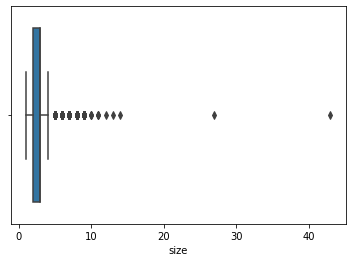

In [82]:
sns.boxplot(x=df7['size'])

In [87]:
size_threshold_max = df7['size'].quantile(0.999)
size_threshold_min = df7['size'].quantile(0.05)
size_threshold_min, size_threshold_max

(1.0, 9.0)

In [91]:
df8 = df7[df7['size']>size_threshold_min]
df8 = df8[df8['size']<size_threshold_max]
df8.head()

,area_type,location,size,total_sqft,bath,price
0,Super built-up Area,Electronic City Phase II,2,1056.0,2,39.07
1,Plot Area,Chikka Tirupathi,4,2600.0,5,120.00
2,Built-up Area,Uttarahalli,3,1440.0,2,62.00
3,Super built-up Area,Lingadheeranahalli,3,1521.0,3,95.00
4,Super built-up Area,Kothanur,2,1200.0,2,51.00


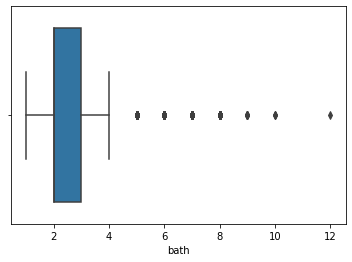

In [106]:
sns.boxplot(x=df9['bath'])

In [102]:
sqft_threshold_max = df8['total_sqft'].quantile(0.999)
sqft_threshold_min = df8['total_sqft'].quantile(0.01)
sqft_threshold_min, sqft_threshold_max

(600.0, 10961.585000000048)

In [104]:
df9 = df8[df8['total_sqft']>sqft_threshold_min]
df9 = df9[df9['total_sqft']<sqft_threshold_max]
df9.shape

(11773, 6)

In [107]:
df9['bath'].value_counts()

2     6736
3     3079
4     1059
5      412
6      224
1      146
7       71
8       35
9        7
10       3
12       1
Name: bath, dtype: int64

In [108]:
df9.isnull().sum()

area_type     0
location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [120]:
df9.corr()['price']

size          0.435757
total_sqft    0.717038
bath          0.492472
price         1.000000
Name: price, dtype: float64

In [121]:
df9['location'].describe()

count          11773
unique          1189
top       Whitefield
freq             487
Name: location, dtype: object

In [126]:
location_stats = df9['location'].value_counts()
location_stats_lessthan10 = location_stats[location_stats<10]
location_stats_morethan10 = location_stats[location_stats>10]
len(location_stats_lessthan10), len(location_stats_morethan10)

(954, 223)

In [130]:
def helper5(x):
  if x in location_stats_lessthan10:
    return None
  else:
    return x

In [131]:
df10 = df9.copy()
df10['location'] = df10['location'].apply(helper5)
df10.shape

(11773, 6)

In [132]:
df10.isnull().sum()

area_type        0
location      2467
size             0
total_sqft       0
bath             0
price            0
dtype: int64

In [133]:
df11 = df10.dropna()
df11.isnull().sum()

area_type     0
location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [134]:
df11.shape

(9306, 6)

In [135]:
len(df11['location'].unique())

235

In [136]:
df11.head()

,area_type,location,size,total_sqft,bath,price
0,Super built-up Area,Electronic City Phase II,2,1056.0,2,39.07
1,Plot Area,Chikka Tirupathi,4,2600.0,5,120.00
2,Built-up Area,Uttarahalli,3,1440.0,2,62.00
3,Super built-up Area,Lingadheeranahalli,3,1521.0,3,95.00
4,Super built-up Area,Kothanur,2,1200.0,2,51.00


In [137]:
dummy1_df = pd.get_dummies(df11['area_type'])
dummy1_df = dummy1_df.iloc[:, 1:]
dummy1_df

,Carpet Area,Plot Area,Super built-up Area
0,0,0,1
1,0,1,0
2,0,0,0
3,0,0,1
4,0,0,1
...,...,...,...
13313,0,0,1
13314,0,0,1
13315,0,0,0
13317,0,0,0


In [138]:
df12 = pd.concat([df11, dummy1_df], axis='columns')
df12.head()

,area_type,location,size,total_sqft,bath,price,Carpet Area,Plot Area,Super built-up Area
0,Super built-up Area,Electronic City Phase II,2,1056.0,2,39.07,0,0,1
1,Plot Area,Chikka Tirupathi,4,2600.0,5,120.00,0,1,0
2,Built-up Area,Uttarahalli,3,1440.0,2,62.00,0,0,0
3,Super built-up Area,Lingadheeranahalli,3,1521.0,3,95.00,0,0,1
4,Super built-up Area,Kothanur,2,1200.0,2,51.00,0,0,1


In [139]:
dummy2_df = pd.get_dummies(df12['location'])
dummy2_df = dummy2_df.iloc[:, 1:]
dummy2_df

,1st Block Jayanagar,1st Block Koramangala,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vidyaranyapura,Vijayanagar,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13313,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13314,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13315,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
13317,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [142]:
df13 = pd.concat([df12, dummy2_df], axis='columns')
df13.head()

,area_type,location,size,total_sqft,bath,price,Carpet Area,Plot Area,Super built-up Area,1st Block Jayanagar,...,Vidyaranyapura,Vijayanagar,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,Super built-up Area,Electronic City Phase II,2,1056.0,2,39.07,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,Plot Area,Chikka Tirupathi,4,2600.0,5,120.00,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Built-up Area,Uttarahalli,3,1440.0,2,62.00,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Super built-up Area,Lingadheeranahalli,3,1521.0,3,95.00,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,Super built-up Area,Kothanur,2,1200.0,2,51.00,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [143]:
df14 = df13.drop(columns=['area_type', 'location'])
df14.head()

,size,total_sqft,bath,price,Carpet Area,Plot Area,Super built-up Area,1st Block Jayanagar,1st Block Koramangala,1st Phase JP Nagar,...,Vidyaranyapura,Vijayanagar,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2,1056.0,2,39.07,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,4,2600.0,5,120.00,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,1440.0,2,62.00,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,1521.0,3,95.00,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,1200.0,2,51.00,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [144]:
X = df14.drop(columns=['price']).values
y = df14['price'].values


In [147]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)


In [148]:
df14.corr()['price']

size                  0.492862
total_sqft            0.736123
bath                  0.553663
price                 1.000000
Carpet  Area         -0.008014
                        ...   
Yelachenahalli       -0.005009
Yelahanka            -0.015097
Yelahanka New Town    0.012346
Yelenahalli          -0.016839
Yeshwanthpur          0.005670
Name: price, Length: 241, dtype: float64

In [149]:
from sklearn.linear_model import LinearRegression
reg1 = LinearRegression()
reg1.fit(x_train, y_train)
y_preds1 = reg1.predict(x_test)
y_preds1

array([36.39537931, 41.36109322, 43.10160983, ..., 25.97804299,
       20.83443128, 87.4108445 ])

In [150]:
from sklearn.metrics import r2_score
r2_score(y_preds1, y_test)

0.49213878475395945

In [151]:
from sklearn.svm import SVR
reg2 = SVR(kernel='rbf')
reg2.fit(x_train, y_train)
y_preds2 = reg2.predict(x_test)
y_preds2

array([48.01450179, 54.85747809, 55.14129669, ..., 42.8304308 ,
       47.57077167, 55.14137004])

In [152]:
r2_score(y_preds2, y_test)

-1.4374324525521014

In [153]:
from sklearn.tree import DecisionTreeRegressor
reg3 = DecisionTreeRegressor(random_state=0)
reg3.fit(x_train, y_train)
y_preds3 = reg3.predict(x_test)
y_preds3

array([29.5       , 62.        , 40.42      , ..., 32.66666667,
       50.        , 46.45      ])

In [154]:
r2_score(y_preds3, y_test)

0.4152587468565556

In [155]:
from sklearn.ensemble import RandomForestRegressor
reg4 = RandomForestRegressor(n_estimators=5, random_state=0)
reg4.fit(x_train, y_train)
y_preds4 = reg4.predict(x_test)
y_preds4

array([33.8  , 54.288, 41.572, ..., 31.53 , 43.3  , 43.168])

In [156]:
r2_score(y_preds4, y_test)

0.4773290100347164

In [158]:
from sklearn.ensemble import RandomForestRegressor
reg5 = RandomForestRegressor(n_estimators=10, random_state=0)
reg5.fit(x_train, y_train)
y_preds5 = reg5.predict(x_test)
y_preds5

array([39.527     , 53.619     , 48.33166667, ..., 31.915     ,
       43.5       , 47.82      ])

In [159]:
r2_score(y_preds5, y_test)

0.4914634629016915

In [160]:
from sklearn.ensemble import RandomForestRegressor
reg6 = RandomForestRegressor(n_estimators=50, random_state=0)
reg6.fit(x_train, y_train)
y_preds6 = reg6.predict(x_test)
y_preds6

array([38.76873333, 55.28526364, 44.20895   , ..., 32.75685714,
       44.97      , 47.04086429])

In [161]:
r2_score(y_preds6, y_test)

0.4980929700964515

In [172]:
from sklearn.ensemble import RandomForestRegressor
reg7 = RandomForestRegressor(n_estimators=115, random_state=0)
reg7.fit(x_train, y_train)
y_preds7 = reg7.predict(x_test)
y_preds7

array([38.66614493, 56.28228854, 44.74931118, ..., 32.64674948,
       44.39275362, 47.53505694])

In [173]:
r2_score(y_preds7, y_test)

0.5012750803662877

In [174]:
import pickle

In [175]:
with open('BHP2_model.pickle', 'wb') as f:
  pickle.dump(reg7, f)

In [176]:
df14.columns

Index(['size', 'total_sqft', 'bath', 'price', 'Carpet  Area', 'Plot  Area',
       'Super built-up  Area', '1st Block Jayanagar', '1st Block Koramangala',
       '1st Phase JP Nagar',
       ...
       'Vidyaranyapura', 'Vijayanagar', 'Vishwapriya Layout', 'Vittasandra',
       'Whitefield', 'Yelachenahalli', 'Yelahanka', 'Yelahanka New Town',
       'Yelenahalli', 'Yeshwanthpur'],
      dtype='object', length=241)

In [178]:
import json
columns = {
    "data_columns":[col.lower() for col in df14.columns]
}
with open('BHP2_columns.json', 'w') as f:
  f.write(json.dumps(columns))